In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [4]:
# Read in Scrapped news headlines from the 001 process

df_without = pd.read_csv('./without_name/all_headlines_without_names.tsv', sep="\t")
# df_with = pd.read_csv('./with_name/all_headlines.tsv', sep="\t")

In [5]:
df_without.shape, 
# df_with.shape 

((611511, 2),)

In [6]:
# Unique value
# df_without['뉴스제목'].nunique(), 

df_without['주가변동'].nunique()

2

In [7]:
# Unique value
df_without['뉴스제목'].nunique(), df_without['주가변동'].nunique()

(563319, 2)

In [8]:
# Remove Duplicates
df_without.drop_duplicates(subset=['뉴스제목'], inplace=True) #reviews열에서 중복인 내용이 있다면 중복 제거
print('총 샘플의 수 : ',len(df_without))

총 샘플의 수 :  563320


In [17]:
# Remove Duplicates
# df_with.drop_duplicates(subset=['뉴스제목'], inplace=True) #reviews열에서 중복인 내용이 있다면 중복 제거
# print('총 샘플의 수 : ',len(df_with))

총 샘플의 수 :  501441


In [9]:
# NULL값 유무
print(df_without.isnull().values.any())
# print(df_with.isnull().values.any())

True


In [10]:
# Remove Null rows
df_without = df_without.dropna(how='any',axis=0)
print(df_without.isnull().values.any())

False


In [11]:
# after removing Null and Duplicates
# df_with.shape
df_without.shape

(563319, 2)

In [12]:
without_len = df_without['뉴스제목'].astype(str).apply(len)
# print(without_len.head())
print("Max Length: ", without_len.max())
print("Min Length: ", without_len.min())

# with_len = df_with['뉴스제목'].astype(str).apply(len)
# # print(without_len.head())
# print(with_len.max())
# print(with_len.min())

Max Length:  48
Min Length:  2


In [13]:
df_without['str_len']= df_without['뉴스제목'].str.len()
# df_with['str_len']= df_with['뉴스제목'].str.len()

C:\MG\Python\Python39\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


git test delete later

In [15]:
df_without.loc[(df_without['str_len'] < 10)]


,뉴스제목,주가변동,str_len
203,[인사],0,5
340,"조합원, 거리로",0,9
569,", 감사본부 신설",0,9
880,현금 배당 결정,0,9
884,행복나눔 바자회,0,9
...,...,...,...
608548,공개된 EV6,0,8
608716,광주백화점 전경,1,8
609303,'희망공부방',1,8
610091,'공매도 몸살',0,9


In [ ]:
# df_with.loc[(df_with['str_len'] < 10)]

In [16]:
df_without['뉴스제목'].head

<bound method NDFrame.head of 0                            24, 와인 경쟁력 강화로 가맹점 매출 높인다
1                       ENM, 1분기 매출 8108억원, 영업이익 397억원
2                             최신원  회장, '다락휴'로 호텔사업 키운다
3                        , 게임박스에 인디게임 3종 출시…토종 생태계 키운다
4                         신한금투 "현대·차 1분기 영업익 기대치 밑돌 듯"
                              ...                     
611506            [ET투자뉴스]케이씨텍, "하반기부터 수주 모…" BUY(유지)-
611507    [ET투자뉴스], "북미회담 쇼크 반영…" MARKETPERFORM-대신증...
611508                   , 사내 자선경매 수익금 장애 어린이 위해 전액 기부
611509                     ·S, '5G 월드 어워드' 잇따라 수상 '쾌거'
611510                 신한은행, 리테일과 손잡고 '백만원 챌린지' 이벤트 실시
Name: 뉴스제목, Length: 563319, dtype: object>

최단:  2
최장:  48
평균:  28
(48,)


Text(0.5, 1.0, 'Sentence Length Distribution (Without)')

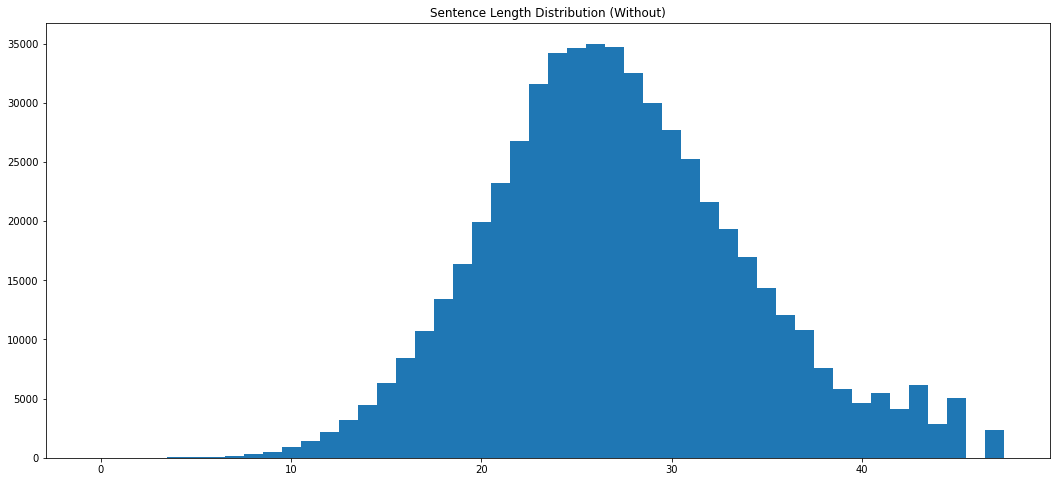

In [17]:
min_len = 999
max_len = 0
sum_len = 0

raw = df_without['뉴스제목'].tolist()

for sen in raw:
  length = len(sen)
  if min_len > length: min_len = length
  if max_len < length: max_len = length
  sum_len += length

print("최단: ", min_len)
print("최장: ", max_len)
print("평균: ", sum_len//len(raw))

sentence_length = np.zeros((max_len), dtype=np.int)

for sen in raw:
  sentence_length[len(sen)-1] += 1

print(sentence_length.shape)

f, ax = plt.subplots(figsize=(18,8))

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution (Without)")

In [ ]:
# min_len = 999
# max_len = 0
# sum_len = 0

# raw = df_with['뉴스제목'].tolist()

# for sen in raw:
#   length = len(sen)
#   if min_len > length: min_len = length
#   if max_len < length: max_len = length
#   sum_len += length

# print("최단: ", min_len)
# print("최장: ", max_len)
# print("평균: ", sum_len//len(raw))

# sentence_length = np.zeros((max_len), dtype=np.int)

# for sen in raw:
#   sentence_length[len(sen)-1] += 1

# print(sentence_length.shape)

# f, ax = plt.subplots(figsize=(18,8))

# plt.bar(range(max_len), sentence_length, width=1.0)
# plt.title("Sentence Length Distribution (With name)")

In [18]:
# with_head = [x for x in df_with['뉴스제목'] if type(x) is str]
without_head = [x for x in df_without['뉴스제목'] if type(x) is str]

In [ ]:
# wordcloud = WordCloud(font_path='./fonts/NanumGothic.ttf', width=1000, height=500).generate(' '.join(with_head))
# plt.figure(figsize=(15,10))
# plt.title("WordCloud With stock name")
# plt.imshow(wordcloud)
# plt.axis('off')
# plt.show()

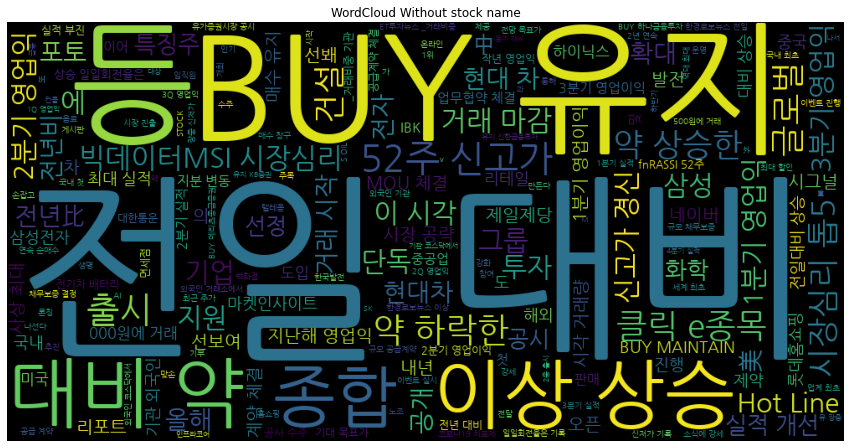

In [19]:
wordcloud = WordCloud(font_path='./fonts/NanumGothic.ttf', width=1000, height=500).generate(' '.join(without_head))
plt.figure(figsize=(15,10))
plt.title("WordCloud Without stock name")
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Now really want to see what I can do with the data.

In [ ]:
# No need for this, this would be just waste of time, 
# Histogram already shown its normal distribution 

# data = [with_len, without_len]
# fig1, ax1 = plt.subplots(figsize=(15,10))
# ax1.set_xticklabels(('With stock name', 'Without stock name'))
# ax1.boxplot(data)
# plt.show()

In [ ]:
# # df_with['주가변동'].value_counts().plot(kind='bar', color)
# df_with['주가변동'].value_counts().plot.bar(color=['darkblue','darkorange'])

<AxesSubplot:>

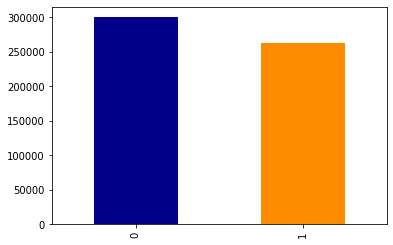

In [20]:
df_without['주가변동'].value_counts().plot.bar(color=['darkblue','darkorange'])

In [96]:
# scale both to the same number
print('Number of Price up: {}'.format(df_without['주가변동'].value_counts()[1]))
print('Number of Price down: {}'.format(df_without['주가변동'].value_counts()[0]))
without_dif = df_without['주가변동'].value_counts()[0] - df_without['주가변동'].value_counts()[1]

Number of Price up: 263109
Number of Price down: 300210


In [97]:
# print('Number of Price up: {}'.format(df_with['주가변동'].value_counts()[1]))
# print('Number of Price down: {}'.format(df_with['주가변동'].value_counts()[0]))
# with_dif = df_with['주가변동'].value_counts()[0] - df_with['주가변동'].value_counts()[1]

Number of Price up: 234192
Number of Price down: 267249


In [99]:
df_without.shape, df_with.shape

((563319, 2), (501441, 2))

In [109]:
# match the number of up and down
# 

pd_without = df_without.drop(df_without[df_without['주가변동'] == 0].sample(n=without_dif).index)
pd_with = df_with.drop(df_with[df_with['주가변동'] == 0].sample(n=with_dif).index)


# del(pd_without)
# del(pd_with)

((526218, 2), (468384, 2))

In [110]:
print('Number of Price up: {}'.format(pd_without['주가변동'].value_counts()[1]))
print('Number of Price down: {}'.format(pd_without['주가변동'].value_counts()[0]))


Number of Price up: 263109
Number of Price down: 263109


In [111]:
print('Number of Price up: {}'.format(pd_with['주가변동'].value_counts()[1]))
print('Number of Price down: {}'.format(pd_with['주가변동'].value_counts()[0]))


Number of Price up: 234192
Number of Price down: 234192


In [112]:
with_word_counts = pd_with['뉴스제목'].astype(str).apply(lambda x:len(x.split(' ')))
without_word_counts = pd_without['뉴스제목'].astype(str).apply(lambda x:len(x.split(' ')))
print(with_word_counts.shape)
print(without_word_counts.shape)

(468384,)
(526218,)


In [113]:
print('with max: {}'.format(np.max(with_word_counts)))
print('with min: {}'.format(np.min(with_word_counts)))
print('with mean: {}'.format(np.mean(with_word_counts)))
print('with std: {}'.format(np.std(with_word_counts)))
print('with median: {}'.format(np.median(with_word_counts)))
print()
print('without max: {}'.format(np.max(without_word_counts)))
print('without min: {}'.format(np.min(without_word_counts)))
print('without mean: {}'.format(np.mean(without_word_counts)))
print('without std: {}'.format(np.std(without_word_counts)))
print('without median: {}'.format(np.median(without_word_counts)))

# max is 15 and mean of 6-7

with max: 15
with min: 1
with mean: 6.554282383685181
with std: 1.6034701695608686
with median: 6.0

without max: 15
without min: 1
without mean: 6.523969153468714
without std: 1.599084062832264
without median: 6.0


Text(0.5, 1.0, 'words Length Distribution (With name)')

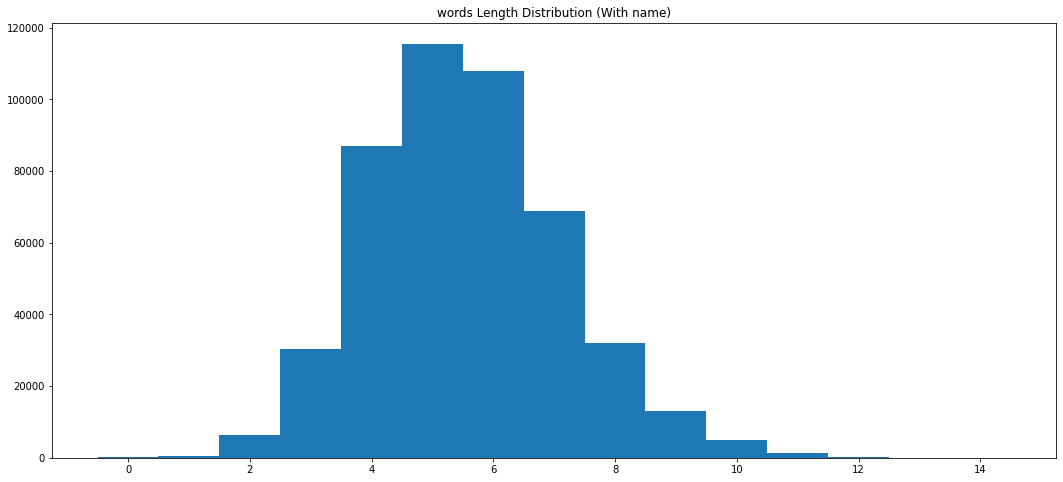

In [114]:
# with histogram
max_c = np.max(with_word_counts)
words_length = np.zeros((max_c), dtype=np.int)

for sen in with_word_counts:
  words_length[sen-1] += 1

f, ax = plt.subplots(figsize=(18,8))

plt.bar(range(max_c), words_length, width=1.0)
plt.title("words Length Distribution (With name)")

Text(0.5, 1.0, 'words Length Distribution (Without name)')

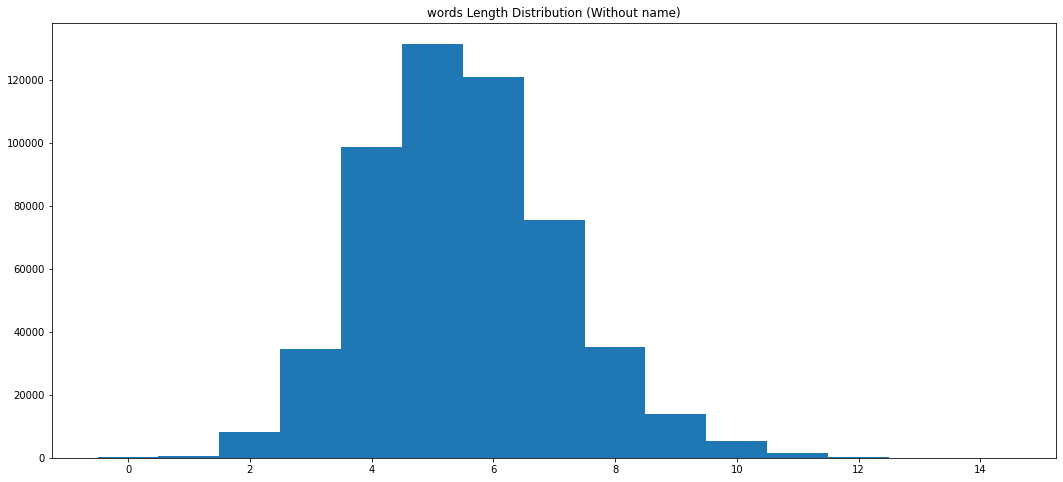

In [115]:
# without histogram
max_c1 = np.max(without_word_counts)
words_length1 = np.zeros((max_c), dtype=np.int)

for sen in without_word_counts:
  words_length1[sen-1] += 1

f, ax = plt.subplots(figsize=(18,8))

plt.bar(range(max_c1), words_length1, width=1.0)
plt.title("words Length Distribution (Without name)")

<AxesSubplot:>

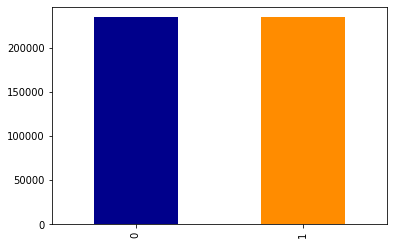

In [117]:
pd_with['주가변동'].value_counts().plot.bar(color=['darkblue','darkorange'])

<AxesSubplot:>

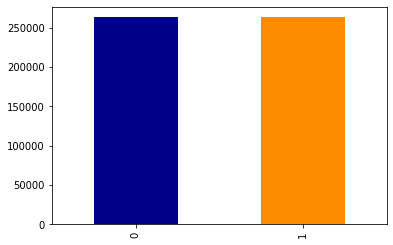

In [118]:
pd_without['주가변동'].value_counts().plot.bar(color=['darkblue','darkorange'])

In [116]:
# df_without = pd.read_csv('./without_name/all_headlines_without_names.tsv', sep="\t")
# df_with = pd.read_csv('./with_name/all_headlines.tsv', sep="\t")
pd_without.to_csv('./without_name/EDA_headlines.tsv', index=False, encoding='utf-8', sep="\t")
pd_with.to_csv('./with_name/EDA_headlines.tsv', index=False, encoding='utf-8', sep="\t")